In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [4]:
fn = "input/wikipedia_edits.csv.zip"
df = pd.read_csv(fn)

In [5]:
len(df)

789343

In [76]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


In [77]:
df["date"] = df["timestamp"].dt.date

In [78]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0,2018-09-10
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0,2018-09-09
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0,2018-09-08
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08


In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [81]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0,2018-09-10
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0,2018-09-09
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0,2018-09-08
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08


In [82]:
title = "Manny_Pacquiao"
df_sub = df[df["title"]==title]

In [83]:
len(df_sub)

8917

In [84]:
df_sub.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
477505,Manny_Pacquiao,858923775,858924908,2018-09-10 15:07:25+00:00,MroWikipedian,34478357.0,96240,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10
477506,Manny_Pacquiao,858393401,858923775,2018-09-10 14:57:58+00:00,MroWikipedian,34478357.0,95925,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10
477507,Manny_Pacquiao,858392991,858393401,2018-09-06 21:20:17+00:00,Tbb 911,7097402.0,95879,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06
477508,Manny_Pacquiao,858165549,858392991,2018-09-06 21:16:11+00:00,Tbb 911,7097402.0,95954,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06
477509,Manny_Pacquiao,858165135,858165549,2018-09-05 14:23:28+00:00,PinoyBoxing11,15621670.0,95951,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-05


In [85]:
date_min = df_sub["date"].min()
date_max = df_sub["date"].max()

In [86]:
date_min, date_max

(datetime.date(2004, 8, 20), datetime.date(2018, 9, 10))

In [87]:
'Date range: {:%m/%d/%Y} to {:%m/%d/%Y}'.format(date_min, date_max)

'Date range: 08/20/2004 to 09/10/2018'

In [89]:
df_daily = df_sub.groupby("date")["revid"].agg([len])

In [90]:
df_daily.head()

,len
date,
2004-08-20,5
2004-09-06,4
2004-09-12,1
2004-10-14,1
2004-10-22,1


In [91]:
x = df_daily.index

In [92]:
y = df_daily["len"]

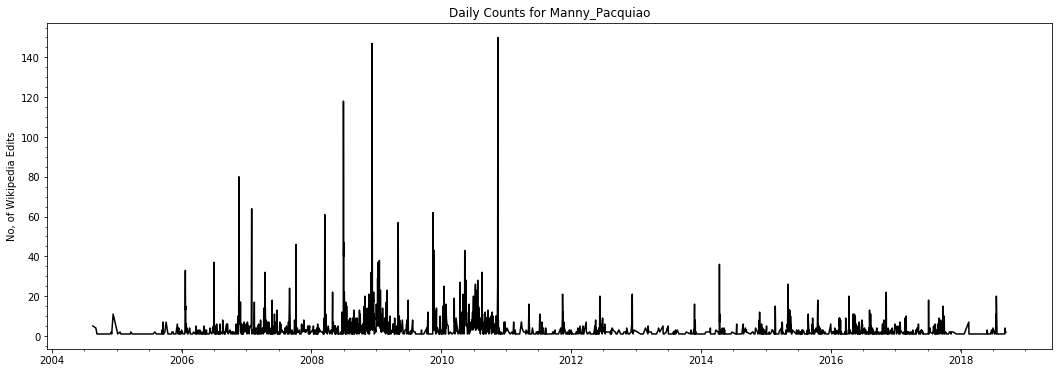

In [93]:
plt.figure(figsize=(18,6))
plt.plot(x,y, color='black')
plt.ylabel("No, of Wikipedia Edits")
plt.title("Daily Counts for %s" % title)
plt.minorticks_on()

In [94]:
df_MP = df[df["title"] == "Manny_Pacquiao"]
df_FM = df[df["title"] == "Floyd_Mayweather_Jr."]

In [95]:
df_daily_MP = df_MP.groupby("date")["revid"].agg([len])
df_daily_FM = df_FM.groupby("date")["revid"].agg([len])

In [96]:
x_MP = df_daily_MP.index
x_FM = df_daily_FM.index

In [97]:
y_MP = df_daily_MP["len"]
y_FM = df_daily_FM["len"]

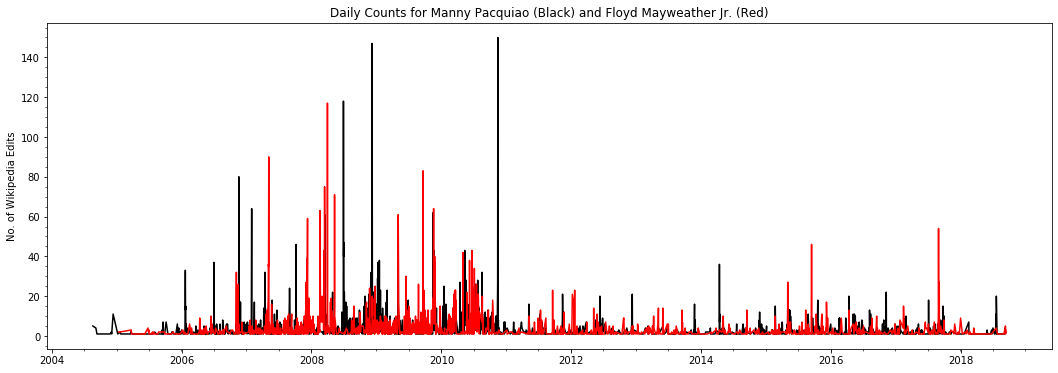

In [98]:
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, color = "black")
plt.plot(x_FM, y_FM, color = "red")
plt.ylabel("No. of Wikipedia Edits")
plt.title("Daily Counts for Manny Pacquiao (Black) and Floyd Mayweather Jr. (Red)")
plt.minorticks_on()

In [100]:
date_start = pd.to_datetime("2015/01/01")
date_end = pd.to_datetime("2015/12/31")

(735599.0, 735963.0)

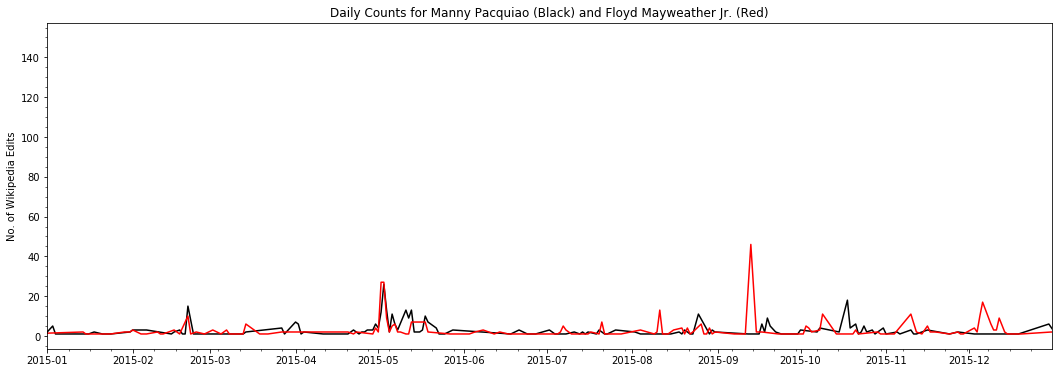

In [101]:
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, 'k-')
plt.plot(x_FM, y_FM, 'r-')
plt.ylabel("No. of Wikipedia Edits")
plt.title("Daily Counts for Manny Pacquiao (Black) and Floyd Mayweather Jr. (Red)")
plt.minorticks_on()
plt.xlim((date_start, date_end))

(0, 55)

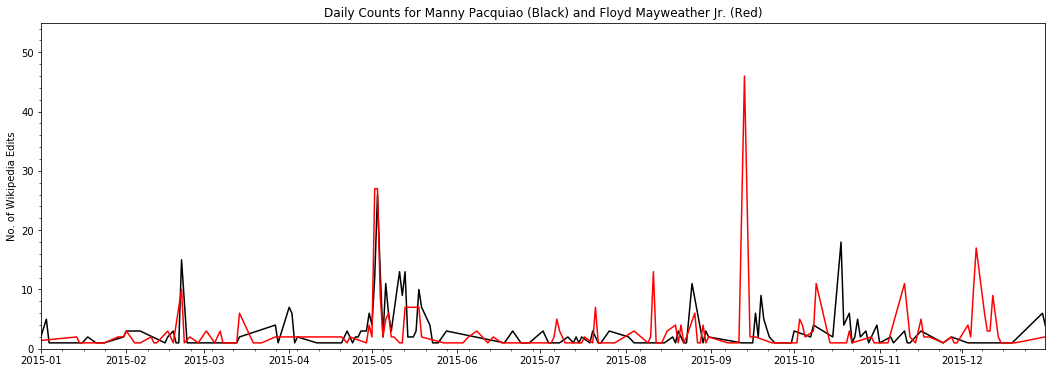

In [102]:
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, 'k-')
plt.plot(x_FM, y_FM, 'r-')
plt.ylabel("No. of Wikipedia Edits")
plt.title("Daily Counts for Manny Pacquiao (Black) and Floyd Mayweather Jr. (Red)")
plt.minorticks_on()
plt.xlim((date_start, date_end))
plt.ylim((0, 55))

No handles with labels found to put in legend.


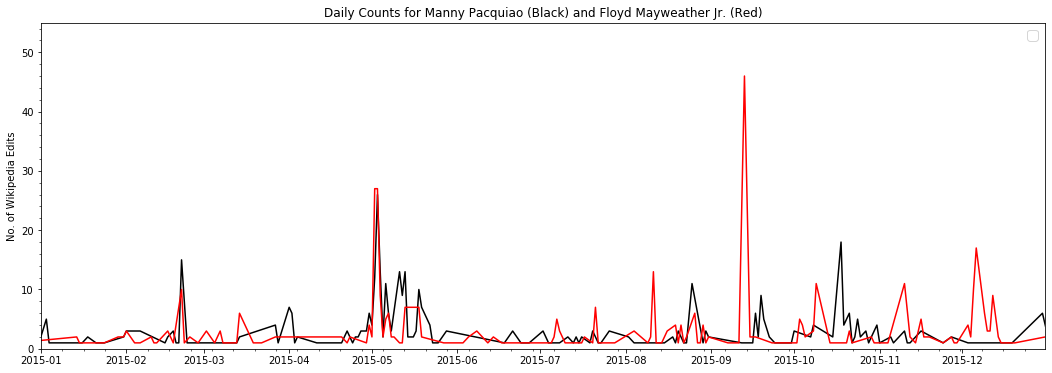

In [103]:
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, 'k-')
plt.plot(x_FM, y_FM, 'r-')
plt.ylabel("No. of Wikipedia Edits")
plt.title("Daily Counts for Manny Pacquiao (Black) and Floyd Mayweather Jr. (Red)")
plt.minorticks_on()
plt.xlim((date_start, date_end))
plt.ylim((0, 55))
plt.legend(fontsize=14)

In [104]:
date_ref = pd.to_datetime("2015/05/02")

In [105]:
label_ref = "The Fight of the Century"

In [106]:
date_num_ref = matplotlib.dates.date2num(date_ref)

No handles with labels found to put in legend.


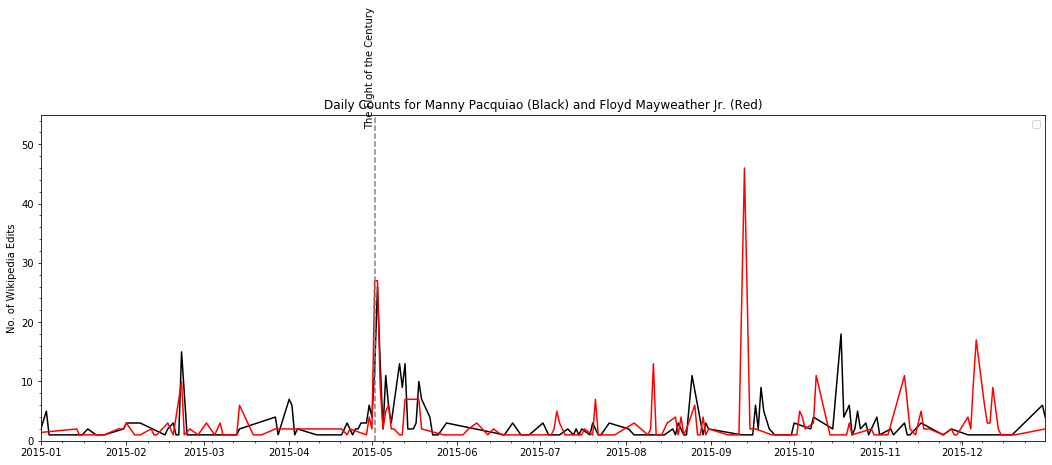

In [107]:
plt.figure(figsize=(18,6))
plt.plot(x_MP, y_MP, 'k-')
plt.plot(x_FM, y_FM, 'r-')
plt.ylabel("No. of Wikipedia Edits")
plt.title("Daily Counts for Manny Pacquiao (Black) and Floyd Mayweather Jr. (Red)")
plt.minorticks_on()
plt.xlim((date_start, date_end))
plt.ylim((0, 55))
plt.legend()
plt.axvline(date_ref, color = "gray", ls="--")
plt.text(date_num_ref, 53, label_ref, rotation = 90, horizontalalignment = "right")
plt.savefig("fig/fig_timeseries_Pacquio_Mayweather.png", dpi = 200, box_inches = "tight")